<a href="https://colab.research.google.com/github/2303A51128/AIML-2303a51128/blob/main/lab_exam_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

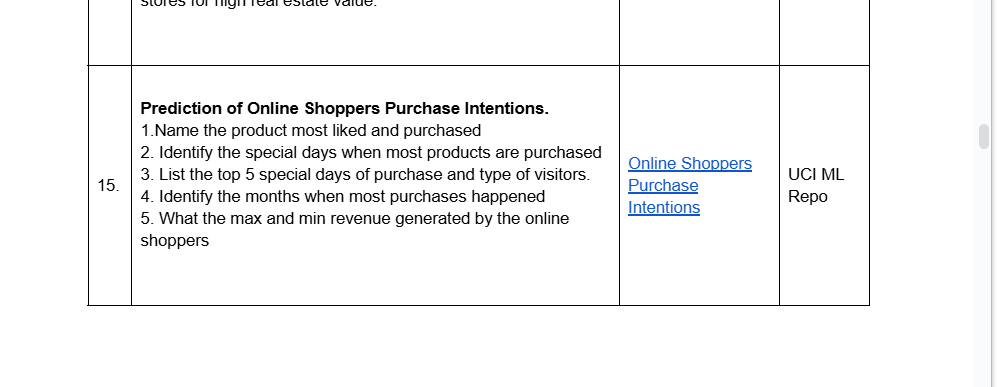

In [ ]:
import pandas as pd
df = pd.read_csv('/content/online_shoppers_intention.csv')


print("Columns in the dataset:", df.columns)
print("Sample data:\n", df.head())


try:
    most_purchased_product = df['ProductColumn'].value_counts().idxmax()
    print("1. The product most liked and purchased is:", most_purchased_product)
except KeyError:
    print("Error: Column 'ProductColumn' not found. Please replace it with the correct column name.")


try:
    most_purchased_days = df[df['SpecialDayColumn'] > 0.5]['SpecialDayColumn'].value_counts().idxmax()
    print("2. The special day with the most purchases is:", most_purchased_days)
except KeyError:
    print("Error: Column 'SpecialDayColumn' not found. Please replace it with the correct column name.")


try:
    top_5_days = df[df['SpecialDayColumn'] > 0.5].groupby('SpecialDayColumn')['VisitorTypeColumn'].value_counts().nlargest(5)
    print("3. The top 5 special days and types of visitors are:\n", top_5_days)
except KeyError as e:
    print(f"Error: Column '{e.args[0]}' not found. Please replace it with the correct column name.")


try:
    df['Month'] = pd.to_datetime(df['DateColumn']).dt.month  # Extract month from the date
    most_purchased_month = df['Month'].value_counts().idxmax()
    print("4. The month with the most purchases is:", most_purchased_month)
except KeyError:
    print("Error: Column 'DateColumn' not found. Please replace it with the correct column name.")
except Exception as e:
    print("Error in date processing:", e)


try:
    max_revenue = df['RevenueColumn'].max()
    min_revenue = df['RevenueColumn'].min()
    print("5. Max Revenue:", max_revenue)
    print("   Min Revenue:", min_revenue)
except KeyError:
    print("Error: Column 'RevenueColumn' not found. Please replace it with the correct column name.")


Columns in the dataset: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')
Sample data:
    Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0           

Columns in the dataset: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')
Column 'Product' not found in the dataset.
Special days with most purchases:
SpecialDay
0.0    1831
0.6      29
0.2      14
0.4      13
0.8      11
1.0      10
Name: Revenue, dtype: int64
Top 5 special days of purchase and type of visitors:
SpecialDay  VisitorType      
0.0         Returning_Visitor    9358
            New_Visitor          1636
            Other                  85
0.2         Returning_Visitor     169
            New_Visitor             9
0.4         Returning_Visitor     233
            New_Visitor            10
0.6         Returning_Visitor     329
            New_Visitor            22
0.8         Re

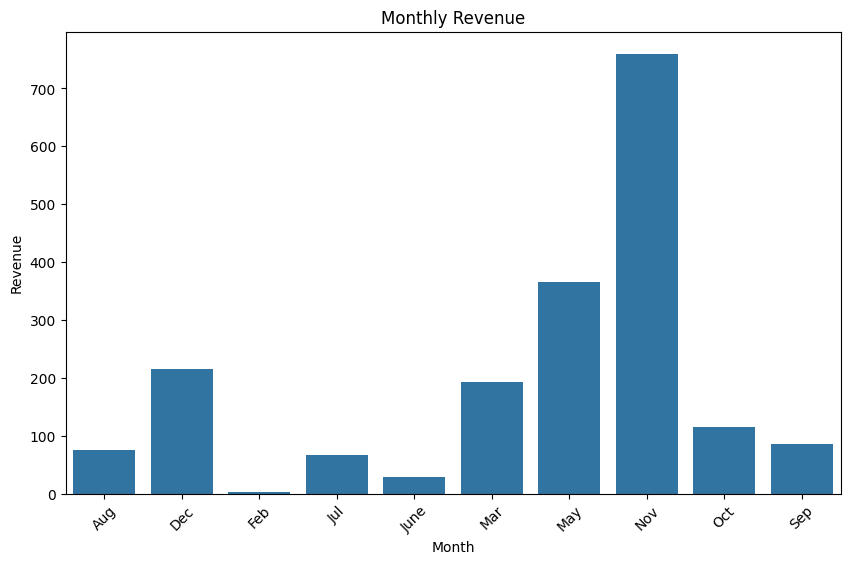

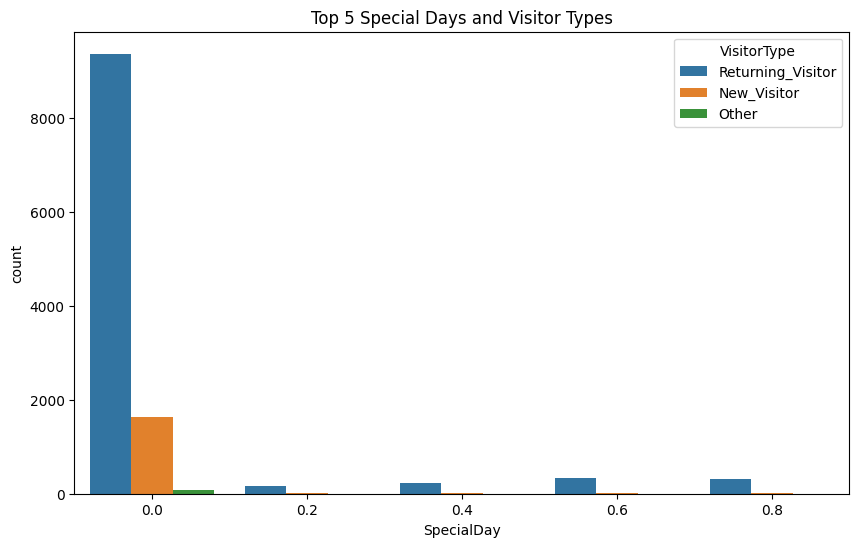

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the dataset
df = pd.read_csv('online_shoppers_intention.csv')

# Display column names to verify correctness
print("Columns in the dataset:", df.columns)

# 1. Name the product most liked and purchased (assuming the dataset has a column for products)
if 'Product' in df.columns:
    most_liked_product = df['Product'].mode()[0]
    print("Most liked and purchased product:", most_liked_product)
else:
    print("Column 'Product' not found in the dataset.")

# 2. Identify the special days when most products are purchased
if 'SpecialDay' in df.columns and 'Revenue' in df.columns:
    special_days = df.groupby('SpecialDay')['Revenue'].sum().sort_values(ascending=False)
    print("Special days with most purchases:")
    print(special_days.head(10))
else:
    print("Required columns for special days analysis ('SpecialDay' or 'Revenue') not found.")

# 3. List the top 5 special days of purchase and type of visitors
if 'VisitorType' in df.columns and 'SpecialDay' in df.columns:
    top_5_special_days = special_days.head(5)
    print("Top 5 special days of purchase and type of visitors:")
    print(df[df['SpecialDay'].isin(top_5_special_days.index)].groupby('SpecialDay')['VisitorType'].value_counts())
else:
    print("Required columns for visitor type analysis ('VisitorType' or 'SpecialDay') not found.")

# 4. Identify the months when most purchases happened
if 'Month' in df.columns and 'Revenue' in df.columns:
    # Assuming 'Month' is a string representing month names
    monthly_purchases = df.groupby('Month')['Revenue'].sum()
    print("Monthly purchases:")
    print(monthly_purchases)
else:
    print("Required columns for monthly purchases ('Month' or 'Revenue') not found.")

# 5. What is the max and min revenue generated by the online shoppers
if 'Revenue' in df.columns:
    max_revenue = df['Revenue'].max()
    min_revenue = df['Revenue'].min()
    print("Max revenue:", max_revenue)
    print("Min revenue:", min_revenue)
else:
    print("Column 'Revenue' not found in the dataset.")

# Visualizations
# Plot monthly purchases
if 'Month' in df.columns and 'Revenue' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=monthly_purchases.index, y=monthly_purchases.values)
    plt.title('Monthly Revenue')
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.xticks(rotation=45)
    plt.show()

# Plot top 5 special days and visitor types
if 'SpecialDay' in df.columns and 'VisitorType' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='SpecialDay', hue='VisitorType', data=df[df['SpecialDay'].isin(top_5_special_days.index)])
    plt.title('Top 5 Special Days and Visitor Types')
    plt.show()
